In [1]:
from Model_A import Model_A
from dataset import *
from torch.utils.data import Dataset, DataLoader 
from matplotlib import pyplot as plt 
import numpy as np
import time


In [2]:
data_path = "../../results/model_A_dataset.csv"

trainSet = MotorData(data_path=data_path, train=True)
testSet = MotorData(data_path=data_path, train=False)
trainLoader = DataLoader(dataset=trainSet, batch_size=16,shuffle=True)
testLoader = DataLoader(dataset=testSet, batch_size=16,shuffle=False)

time.time()

1648454005.2105012

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Model_A(name="Model_A").to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
mse_loss = torch.nn.MSELoss()

model.train()
count=0
total = 0
mse_loss_record = []
start_time = time.time()
for epoch in range(50):
    for i, data in enumerate(trainLoader):
        ## x.size() = (batch_size, 2)
        ## y.size() = (batch_size. 1)
        x, label = data 
        x = x.to(torch.float32).to(device)
        label = label.to(torch.float32).to(device)

        prediction = model(x)
        loss = mse_loss(prediction,label)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('epoch #{} loss: {}'.format(epoch,loss))
    mse_loss_record.append(loss.detach().numpy())

print((time.time()-start_time))

epoch #0 loss: 0.3300881087779999
epoch #1 loss: 0.15299516916275024
epoch #2 loss: 0.2226037234067917
epoch #3 loss: 0.20253051817417145
epoch #4 loss: 0.10324659198522568
epoch #5 loss: 0.053042035549879074
epoch #6 loss: 0.02542201243340969
epoch #7 loss: 0.05425054207444191
epoch #8 loss: 0.025099925696849823
epoch #9 loss: 0.018688146024942398
epoch #10 loss: 0.0113363116979599
epoch #11 loss: 0.009880714118480682
epoch #12 loss: 0.019946234300732613
epoch #13 loss: 0.007387710269540548
epoch #14 loss: 0.013463214039802551
epoch #15 loss: 0.006744867190718651
epoch #16 loss: 0.003172065829858184
epoch #17 loss: 0.0010608915472403169
epoch #18 loss: 0.0005872706533409655
epoch #19 loss: 0.0003292122855782509
epoch #20 loss: 0.00018006160098593682
epoch #21 loss: 0.00013519110507331789
epoch #22 loss: 4.0760885894997045e-05
epoch #23 loss: 7.132864266168326e-05
epoch #24 loss: 0.0003896196431014687
epoch #25 loss: 2.3604618036188185e-05
epoch #26 loss: 2.2697598978993483e-05
epoch #

In [4]:
model.eval()
start_time = time.time()*1000
prediction = model(torch.tensor([1.0,1.0])) 
print(time.time()*1000-start_time)

1.03759765625


In [4]:
model.eval()
results_reg = []
labels_reg = []
correct = 0
total = 0
# count_label = 0
# count_pred = 0
confusion = torch.zeros(2,2)

loss_total = 0
with torch.no_grad():
    for i, data in enumerate(trainLoader):
        x, label = data
        ## x.size() = (batch_size, seq_len)
        ## y.size() = (batch_size. 1)
        if(i==0):
            results_reg+=list(x[0].numpy())
            labels_reg+=list(x[0].numpy())          
        x = x.to(device)
        prediction = model(x) 
        loss = mse_loss(label, prediction)
        loss_total += loss

testset_mse_loss = loss_total / len(testLoader)
print(testset_mse_loss)

tensor(1.9743)


In [7]:
model.eval()
results_reg = []
labels_reg = []
correct = 0
total = 0
# count_label = 0
# count_pred = 0
confusion = torch.zeros(2,2)

loss_total = 0
with torch.no_grad():
    for i, data in enumerate(testLoader):
        x, label = data
        ## x.size() = (batch_size, seq_len)
        ## y.size() = (batch_size. 1)
        if(i==0):
            results_reg+=list(x[0].numpy())
            labels_reg+=list(x[0].numpy())          
        x = x.to(device)
        prediction = model(x) 
        loss = mse_loss(label, prediction)
        loss_total += loss

testset_mse_loss = loss_total / len(testLoader)
print(testset_mse_loss)

tensor(0.0009, dtype=torch.float64)


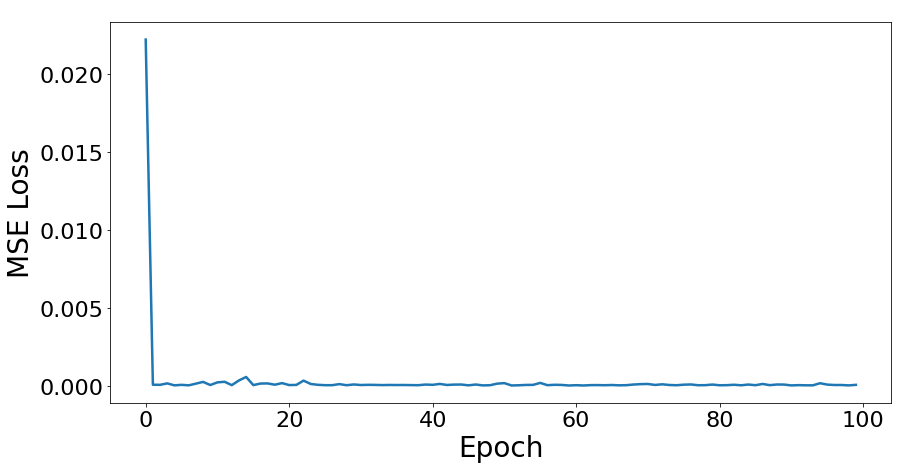

In [12]:
import numpy as np

LINE_WIDTH=2.5
FONT_SIZE = 28


plt.figure(figsize=(14,7))#设置画布的尺寸
plt.title('Examples of line chart',fontsize=20)#标题，并设定字号大小
 
plt.plot(list(range(len(mse_loss_record))),mse_loss_record, linewidth=LINE_WIDTH)
# plt.legend(loc='upper left', fontsize=25)

#设置坐标标签标注和字体大小
plt.xlabel("Epoch",fontsize=FONT_SIZE)
plt.ylabel("MSE Loss",fontsize=FONT_SIZE)

#设置坐标刻度字体大小
plt.xticks(fontsize=FONT_SIZE*0.8)
plt.yticks(fontsize=FONT_SIZE*0.8)

plt.title(" ")
plt.savefig(f"./mse_loss.png",bbox_inches = 'tight')
plt.show()